# Prénom, NOM : Ounissa ACHIR

# TP 2 Detection des anomalies 

X =  [0.456601376346254, 0.611378467222419, 0.450298974121454, 0.639015050160687, 0.628956783929234, 0.566210439236184, 0.567653035917989, 0.436023991176068, 0.545413793921936, 0.439452807759655, 0.512200437106122, 0.391758778213437, 0.521857028376597, 0.719418957558588, 0.299532932277775, 0.498224147510296, 0.27405229214478, 0.382840217174874, 0.424923198942187, 0.520723820767521, 0.443295576665853, 0.398821217319934, 0.504349980195699, 0.64183163783839, 0.387513905380708, 0.393993611595325, 0.5310410091842, 0.688896809246912, 0.649396230864986, 0.46558804569679, 0.625894615887784, 0.334225939695224, 0.366800674159432, 0.741627778279445, 0.382722631316996, 0.56506329156323, 0.350759666395617, 0.568142992439936, 0.498288784798308, 0.43642837150148, 0.603725412643165, 0.588849876959784, 0.698996224157479, 0.67524218097382, 0.645562394844421, 0.415527425810242, 0.291946789621679, 0.437561332273225, 0.333454400810475, 0.543485349854049, 0.441192395259746, 0.570696481995833, 0.706547057105

c:\Users\ordi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


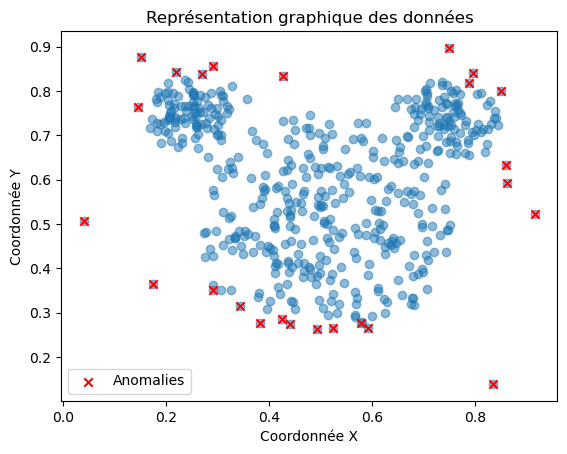

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

with open('C:/Users/ordi/Desktop/Apprentissage_Auto/TP3/mouse.txt', 'r') as file: lines = file.readlines()

data = [line.strip().split() for line in lines]

x_values = [float(row[0]) for row in data]
y_values = [float(row[1]) for row in data]

print('X = ',x_values);
print('Y = ',y_values);
plt.scatter(x_values, y_values, marker='o', alpha=0.5)
plt.title('Représentation graphique des données')
plt.xlabel('Coordonnée X')
plt.ylabel('Coordonnée Y')


from sklearn.ensemble import IsolationForest

features = pd.DataFrame({'X': x_values, 'Y': y_values})
model = IsolationForest(contamination=0.05)
model.fit(features)
anomalies = model.predict(features)


aberrant_x = features.loc[anomalies == -1, 'X']
aberrant_y = features.loc[anomalies == -1, 'Y']

# Afficher les valeurs aberrantes sur le graphique
plt.scatter(aberrant_x, aberrant_y, c='red', marker='x', label='Anomalies')

plt.legend()
plt.show()


c:\Users\ordi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


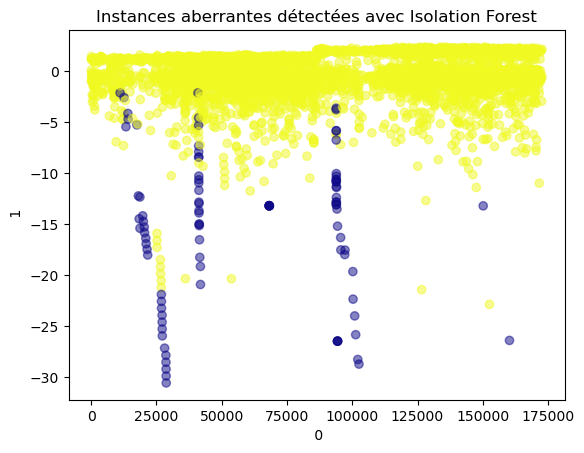

In [32]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/ordi/Desktop/Apprentissage_Auto/TP3/creditcard.csv')

normal_data = data[data['Class'] == 0].sample(n=5000, random_state=42)

fraud_data = data[data['Class'] == 1]

selected_data = pd.concat([normal_data, fraud_data])

X = selected_data.iloc[:, 0:29]  
y = selected_data['Class']

model = IsolationForest(contamination=0.0172, random_state=42) 
model.fit(X)
predictions = model.predict(X)

aberrant_indices = predictions == -1

plt.scatter(selected_data.iloc[:, 0], selected_data.iloc[:, 1], c=predictions, cmap='plasma', marker='o', alpha=0.5)
plt.title('Instances aberrantes détectées avec Isolation Forest')
plt.xlabel(' 0')
plt.ylabel(' 1')
plt.show()
